In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/memona/Desktop/MDU/Hackathon 2024/ediss_hackathon_team7_2024')

In [26]:
from src import vehicular_data_columns, subject_data_columns, neurophysiological_data_columns, video_data_analysis_columns
from src.preprocess import remove_invalid_data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import shap
import matplotlib.pyplot as plt

In [27]:
import pandas as pd
import numpy as np
import sklearn

In [28]:
feature_track_path = '../data/Feature_Track.xlsx'
feature_simulation_path = '../data/Feature_Simulation.xlsx'

# Reading the datasets
feature_track_df = pd.read_excel(feature_track_path)
feature_simulation_df = pd.read_excel(feature_simulation_path)

all_features = pd.concat([feature_track_df, feature_track_df])
all_features.shape

(2112, 89)

In [29]:
target_columns = ['risk_evaluation','risk_outcome']
target_df = all_features[target_columns]
target_df

,risk_evaluation,risk_outcome
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
1051,0,1
1052,0,1
1053,0,1
1054,0,1


In [30]:
df = all_features.drop(columns = ['straight','risk_source_env','risk_source_crash','risk_source_other_usr','Unnamed: 0','subject'] + neurophysiological_data_columns)

In [31]:
cleaned_df = remove_invalid_data(df)
cleaned_df.shape

(2024, 60)

In [32]:
cleaned_df[cleaned_df['risk_outcome']>1]

,lap,start_time,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,car,pedestrian,...,roll_rate,pitch,pitch_rate,lat_acce,long_acce,vert_acce,avg_acce_pedal_pos,std_acce_pedal_pos,avg_steer_angle,std_steer_angle
0,1,7,1,0,0,1,0,0,0,0,...,0.12653,-0.00532,-0.08504,-0.17444,-0.00078,9.67688,12.38381,8.67537,0.07741,1.52931
1,1,27,0,1,0,1,0,0,0,0,...,0.16792,-0.00545,-0.05774,0.09127,-0.58403,9.70116,0.00000,0.00000,2.97287,105.15902
2,1,33,0,0,1,1,0,0,0,0,...,0.09678,-0.00136,-0.11491,1.07801,-0.02341,9.69091,7.81937,5.49554,158.47021,214.39941
3,1,43,1,0,0,0,0,0,0,0,...,0.11270,-0.00473,-0.12279,-0.07267,0.22717,9.66280,13.11911,9.18340,-18.71698,78.85933
4,1,58,1,0,0,0,0,0,1,0,...,0.09467,-0.00502,-0.07835,0.14797,-0.05067,9.68366,10.52989,15.64564,-0.00970,227.44937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,6,102,0,0,1,1,0,0,0,0,...,0.04365,0.00049,0.01209,-2.64695,0.77596,9.36659,23.48667,13.38548,-171.98882,107.18004
888,6,106,0,0,0,0,1,0,0,0,...,0.01678,-0.00292,0.00371,-0.21467,-0.34621,9.54843,9.08517,9.29767,-2.36780,81.12860
889,6,117,1,0,0,1,0,0,0,0,...,0.06648,-0.00776,-0.03967,0.23918,-0.06383,9.52865,16.40625,14.48729,2.50312,6.36652
890,6,130,0,0,0,0,0,0,0,0,...,0.01929,0.00006,-0.10455,2.38444,-0.95398,9.47134,6.62472,6.87710,98.19979,71.11800


In [33]:
# y = cleaned_df[['risk_outcome', 'risk_evaluation']]
y = cleaned_df[['risk_outcome']]
X = cleaned_df.drop(columns = ['risk_outcome', 'risk_evaluation'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y, test_size=0.2, stratify=y)
    

In [36]:
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       328
           2       1.00      0.95      0.97        77

    accuracy                           0.99       405
   macro avg       0.99      0.97      0.98       405
weighted avg       0.99      0.99      0.99       405



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Assuming X_train and y_train are your training features and labels, respectively

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the Gradient Boosting Classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
explainer = shap.Explainer(gb_classifier, X_test)
shap_values = explainer(X_test)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       328
           2       1.00      1.00      1.00        77

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405



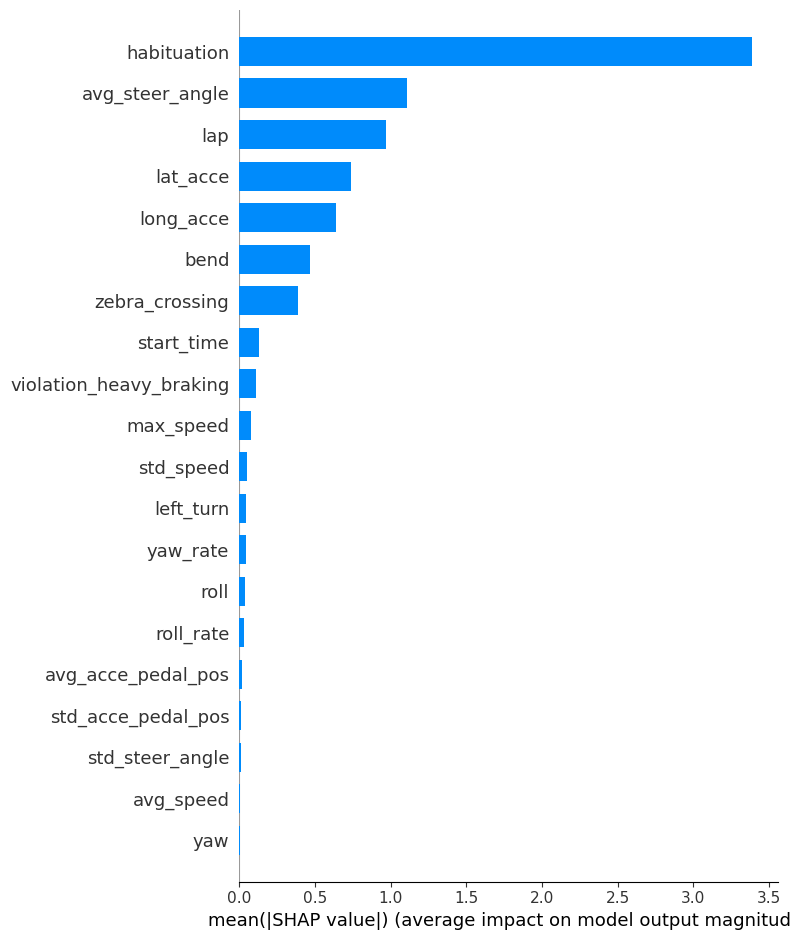

In [40]:
shap.summary_plot(shap_values, X_test,plot_type='bar')